<a href="https://colab.research.google.com/github/federicovicente/PV-Actividad-03-dijkstra/blob/main/dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nodo origen: a
Nodo destino: e
Camino óptimo A->E: ['A', 'B', 'D', 'E']  (longitud = 5)


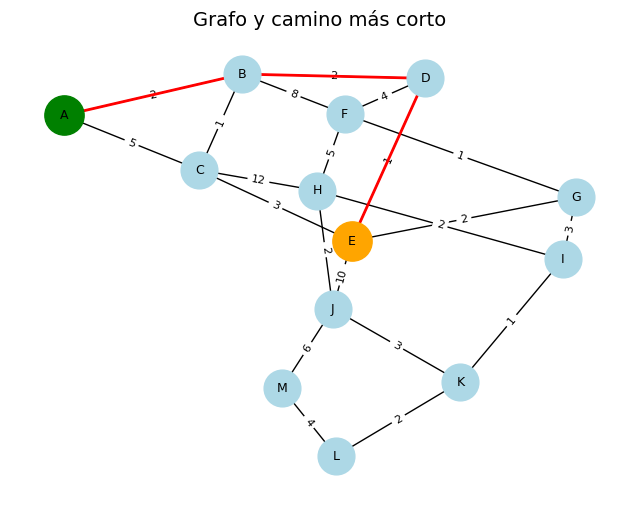

In [13]:
#-------------------------#
# --- Federico Vicente ---#
#-------------------------#

import networkx as nx
import matplotlib.pyplot as plt

def build_graph(directed: bool = False) -> nx.Graph:
    G = nx.DiGraph() if directed else nx.Graph()
    nodes = list("ABCDEFGHIJKLM")
    G.add_nodes_from(nodes)
    edges = [
        ('A', 'B', 2), ('A', 'C', 5), ('B', 'C', 1),
        ('B', 'D', 2), ('C', 'E', 3), ('D', 'E', 1),
        ('D', 'F', 4), ('E', 'G', 2), ('F', 'G', 1),
        ('F', 'H', 5), ('G', 'I', 3), ('H', 'I', 2),
        ('H', 'J', 2), ('I', 'K', 1), ('J', 'K', 3),
        ('K', 'L', 2), ('L', 'M', 4), ('J', 'M', 6),
        ('E', 'J', 10), ('C', 'H', 12), ('B', 'F', 8)
    ]
    G.add_weighted_edges_from(edges)
    return G

def shortest_path(G: nx.Graph, source: str, target: str):
    if not all(node in G for node in (source, target)):
        raise ValueError("Nodo origen o destino inexistente.")
    if not nx.has_path(G, source, target):
        raise nx.NetworkXNoPath(f"No hay camino entre {source} y {target}")
    path = nx.dijkstra_path(G, source, target)
    length = nx.dijkstra_path_length(G, source, target)
    return path, length

def draw_graph(G: nx.Graph, path=None, figsize=(8,6)):
    pos = nx.spring_layout(G, seed=42)
    fig, ax = plt.subplots(figsize=figsize)
    nx.draw(G, pos, ax=ax,
            with_labels=True, node_color='lightblue',
            node_size=700, font_size=9)
    nx.draw_networkx_edge_labels(G, pos,
            edge_labels=nx.get_edge_attributes(G, 'weight'),
            font_size=8)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_nodes(G, pos, nodelist=[path[0]], node_color='green', node_size=800)
        nx.draw_networkx_nodes(G, pos, nodelist=[path[-1]], node_color='orange', node_size=800)
        nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                               edge_color='red', width=2)

    ax.set_title("Grafo y camino más corto", fontsize=14)
    plt.axis('off')
    plt.show()
    return fig, ax

# --- Ejecución interactiva ---
G = build_graph(directed=False)
src = input("Nodo origen: ").strip().upper()
dst = input("Nodo destino: ").strip().upper()

try:
    camino, distancia = shortest_path(G, src, dst)
    print(f"Camino óptimo {src}->{dst}: {camino}  (longitud = {distancia})")
    draw_graph(G, camino)
except Exception as e:
    print(e)